# Desafio: Análise de Dados de Vendas

Neste desafio, você irá criar um programa orientado a objetos para analisar dados de vendas de produtos. Você terá que criar classes para representar produtos, clientes e vendas, e implementar funcionalidades para calcular métricas de desempenho.

In [1]:
#Dependências

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carrega os dados de vendas
df_sales = pd.read_csv('data.csv')

#Verifica se os dados estão sendo carregados corretamente
df_sales.head()

,customer_name,customer_age,product_id,product_name,product_price,product_category,quantity
0,Fulano,25,1,Caderno,10.0,Papelaria,10
1,Beltrano,30,2,Livro,20.0,Livros,5
2,Ciclano,35,3,Caneta,5.0,Papelaria,20
3,Dudu,40,4,Sapato,100.0,Calçados,10
4,Eduardo,45,5,Camiseta,50.0,Vestuário,20


In [3]:
#CLASSES DO PROJETO

# Classe Product
class Product:
    def __init__(self, name, price, category):
        self.name = name
        self.price = price
        self.category = category

# Classe Customer
class Customer:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.purchase_history = []

    def add_purchase(self, sale):
        self.purchase_history.append(sale)

# Classe Sale
class Sale:
    def __init__(self, customer, products):
        self.customer = customer
        self.products = products


    def calculate_total_value(self):
        total_value = 0
        for product in self.products:
            total_value += product.price * product.quantity
        return total_value

# Classe SalesAnalyzer
class SalesAnalyzer:
    def __init__(self, sales):
        self.sales = sales

    # Calcula o total de vendas
    def get_total_sales(self):
        total_sales = 0
        for sale in self.sales:
            total_sales += sale.calculate_total_value()
        return total_sales

    # Exibe o total de vendas
    def get_average_sale_value(self):
        if len(self.sales) == 0:
            return 0
        else:
            return self.get_total_sales() / len(self.sales)

    #Procura o produto mais vendido
    def get_most_sold_product(self):
        most_sold_product = None
        most_sales = 0
        for sale in self.sales:
            for product in sale.products:
                if product.quantity > most_sales:
                    most_sold_product = product
                    most_sales = product.quantity
        return most_sold_product

    # Procura pelo cliente mais ativo
    def get_most_active_customer(self):
        most_active_customer = None
        most_purchases = 0
        for sale in self.sales:
            if len(sale.customer.purchase_history) > most_purchases:
                most_active_customer = sale.customer
                most_purchases = len(sale.customer.purchase_history)
        return most_active_customer

    # Procura pelo cliente que mais gastou
    def get_biggest_spender(self):
        biggest_spender = None
        highest_spending = 0
        for sale in self.sales:
            total_spent = sale.calculate_total_value()
            if total_spent > highest_spending:
                biggest_spender = sale.customer
                highest_spending = total_spent
        return biggest_spender

    def get_most_sold_category(self):
        category_sales = {}  # Dicionário para armazenar as quantidades vendidas por categoria

        # Percorre as vendas para calcular as quantidades vendidas por categoria
        for sale in self.sales:
            for product in sale.products:
                if product.category in category_sales:
                    category_sales[product.category] += product.quantity
                else:
                    category_sales[product.category] = product.quantity

        # Encontra a categoria com a maior quantidade vendida
        most_sold_category = max(category_sales, key=category_sales.get)

        return most_sold_category

In [4]:
# Cria uma lista de objetos Sale a partir do DataFrame
sales = []
for index, row in df_sales.iterrows():
    customer = Customer(row['customer_name'], row['customer_age'])
    product = Product(row['product_name'], row['product_price'], row['product_category'])
    product.quantity = row['quantity']
    sale = Sale(customer, [product])
    sales.append(sale)
    customer.add_purchase(sale)

# Cria um objeto SalesAnalyzer
analyzer = SalesAnalyzer(sales)




In [5]:
#Exibe os resultados da análise

print(f'Total de vendas: R$ {analyzer.get_total_sales()}')
print(f'Média de valor de venda: R$ {analyzer.get_average_sale_value()}')
print(f'Produto mais vendido: {analyzer.get_most_sold_product().name}')
print(f'Cliente mais ativo: {analyzer.get_most_active_customer().name}')
print(f'Cliente que mais gastou: {analyzer.get_biggest_spender().name}')

Total de vendas: R$ 9467.5
Média de valor de venda: R$ 591.71875
Produto mais vendido: Caneta
Cliente mais ativo: Fulano
Cliente que mais gastou: Gustavo


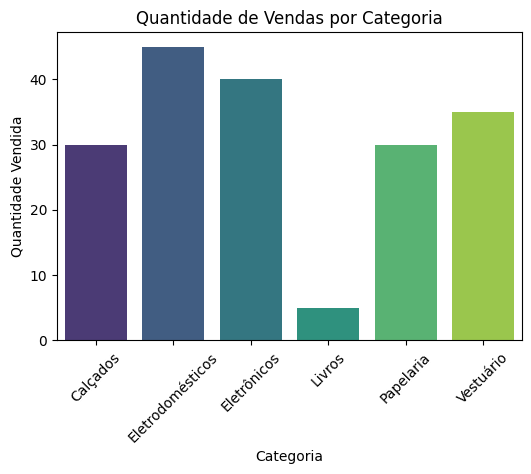

In [6]:
# Calcula a quantidade total vendida de cada categoria
category_sales = df_sales.groupby('product_category')['quantity'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='product_category', y='quantity', data=category_sales, palette='viridis')
plt.title('Quantidade de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()
